In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
from functools import reduce

sys.path.insert(0, 'C:/Users/Bin/Desktop/Thesis/code')
from Conf_EncDecAD_KDD99 import Conf_EncDecAD_KDD99
from EncDecAD import EncDecAD

In [2]:
# Configuration 

data_root = "C:/Users/Bin/Documents/Datasets/KDD99/6_subsets_win/"
conf = Conf_EncDecAD_KDD99(data_root)
#[sn_list, va_list, vn1_list, vn2_list, tn_list, ta_list] = conf.data_list

#p_input = conf.p_input
#p_inputs = conf.p_inputs



batch_num = conf.batch_num
hidden_num = conf.hidden_num
step_num = conf.step_num
elem_num = conf.elem_num

iteration = conf.iteration
modelpath_root = conf.modelpath_root
modelpath = conf.modelpath
decode_without_input = conf.decode_without_input


 

# Training

is training
not training
iter 1: 3.90591
iter 2: 3.80536
iter 3: 4.52335
iter 4: 3.90425
iter 5: 2.85625
iter 6: 2.55766
iter 7: 2.54419
iter 8: 2.01488
iter 9: 1.60878
iter 10: 1.49431
iter 11: 1.21457
iter 12: 1.13021
iter 13: 0.988769
iter 14: 0.773728
iter 15: 0.717091
iter 16: 0.68214
iter 17: 0.529826
iter 18: 0.527434
iter 19: 0.536649
iter 20: 0.469639
iter 21: 0.401282
iter 22: 0.437899
iter 23: 0.336289
iter 24: 0.350537
iter 25: 0.315137
iter 26: 0.341183
iter 27: 0.274279
iter 28: 0.251181
iter 29: 0.249211
iter 30: 0.246063
iter 31: 0.251604
iter 32: 0.224952
iter 33: 0.212661
iter 34: 0.215968
iter 35: 0.201747
iter 36: 0.203544
iter 37: 0.188949
iter 38: 0.197324
iter 39: 0.192199
iter 40: 0.183486
iter 41: 0.173269
iter 42: 0.175932
iter 43: 0.16545
iter 44: 0.163047
iter 45: 0.143498
iter 46: 0.169654
iter 47: 0.149085
iter 48: 0.143423
iter 49: 0.142132
iter 50: 0.131591
iter 51: 0.142397
iter 52: 0.126464
iter 53: 0.138634
iter 54: 0.128423
iter 55: 0.116926
iter 56:

iter 424: 0.0212203
iter 425: 0.00896551
iter 426: 0.0166902
iter 427: 0.00971391
iter 428: 0.0168488
iter 429: 0.0152545
iter 430: 0.0165315
iter 431: 0.0174412
iter 432: 0.010315
iter 433: 0.0097784
iter 434: 0.0236067
iter 435: 0.0112936
iter 436: 0.0105428
iter 437: 0.0137811
iter 438: 0.0139304
iter 439: 0.019977
iter 440: 0.0161091
iter 441: 0.017054
iter 442: 0.014731
iter 443: 0.0120711
iter 444: 0.00984242
iter 445: 0.0127021
iter 446: 0.0105954
iter 447: 0.0131837
iter 448: 0.00995307
iter 449: 0.0137864
iter 450: 0.016843
iter 451: 0.0190329
iter 452: 0.0211471
iter 453: 0.00821821
iter 454: 0.0146765
iter 455: 0.0169766
iter 456: 0.0161628
iter 457: 0.0161285
iter 458: 0.0115215
iter 459: 0.0167931
iter 460: 0.0119421
iter 461: 0.0175513
iter 462: 0.0218651
iter 463: 0.0149202
iter 464: 0.0140249
iter 465: 0.0131384
iter 466: 0.0186843
iter 467: 0.0113445
iter 468: 0.0158518
iter 469: 0.0189852
iter 470: 0.0101362
iter 471: 0.00884224
iter 472: 0.012323
iter 473: 0.013541
i

iter 833: 0.0152153
iter 834: 0.00667833
iter 835: 0.00985841
iter 836: 0.0109707
iter 837: 0.0200754
iter 838: 0.00957397
iter 839: 0.00954405
iter 840: 0.00758258
iter 841: 0.00789776
iter 842: 0.00785489
iter 843: 0.00811344
iter 844: 0.0149193
iter 845: 0.00640738
iter 846: 0.00971215
iter 847: 0.0108982
iter 848: 0.0074505
iter 849: 0.0109325
iter 850: 0.00795097
iter 851: 0.0103129
iter 852: 0.0115606
iter 853: 0.0092176
iter 854: 0.00937321
iter 855: 0.00902788
iter 856: 0.00909589
iter 857: 0.00994085
iter 858: 0.0103314
iter 859: 0.00718575
iter 860: 0.00896394
iter 861: 0.00723042
iter 862: 0.00813688
iter 863: 0.00990945
iter 864: 0.012615
iter 865: 0.0112058
iter 866: 0.0101804
iter 867: 0.0105558
iter 868: 0.0145388
iter 869: 0.00871537
iter 870: 0.0117376
iter 871: 0.0079096
iter 872: 0.0116236
iter 873: 0.0101257
iter 874: 0.00730445
iter 875: 0.0143476
iter 876: 0.010601
iter 877: 0.00872079
iter 878: 0.0115653
iter 879: 0.00915364
iter 880: 0.00672183
iter 881: 0.01086

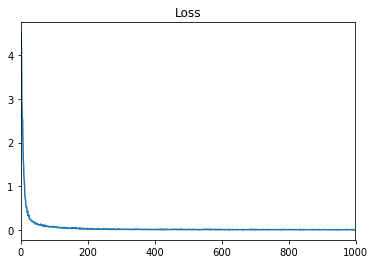

In [3]:

p_input = tf.placeholder(tf.float32, shape=(batch_num, step_num, elem_num),name = "p_input")
p_inputs = [tf.squeeze(t, [1]) for t in tf.split(p_input, step_num, 1)]

p_is_training = tf.placeholder(tf.bool)

#is_training = tf.constant(False,name="is_training")
ae = EncDecAD(hidden_num, p_inputs, p_is_training , decode_without_input=False)

with tf.Session() as sess:
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    loss = []
    for i in range(iteration):
        data =[]
        for temp in range(batch_num):
            ind = np.random.randint(0,len(conf.sn_list)-1)
            sub = conf.sn_list[ind]
            data.append(sub)
        data = np.array(data)
        (loss_val, _) = sess.run([ae.loss, ae.train], {p_input: data,p_is_training : True})
        loss.append(loss_val)
        print('iter %d:' % (i + 1), loss_val)
    pd.Series(loss).plot(title="Loss")

    save_path = saver.save(sess, modelpath)
    print("Model saved in file: %s" % save_path)

# Calculate parameters using Vn1 dataset 

In [3]:
from Parameter_helper import Parameter_Helper

para = Parameter_Helper(conf)

mu, sigma = para.mu_and_sigma()

INFO:tensorflow:Restoring parameters from C:/Users/Bin/Desktop/Thesis/tmp/52test/LSTMAutoencoder_kdd99_v1.ckpt
Model restored.
Initialized
Got parameters mu and sigma.


# Calculate anomaly score, get threshold t using Vn2 and Va dataset.

INFO:tensorflow:Restoring parameters from C:/Users/Bin/Desktop/Thesis/tmp/52test/LSTMAutoencoder_kdd99_v1.ckpt
Finished
Threshold:  0.0712607202931
Model saved accompany with parameters and threshold in file: C:/Users/Bin/Desktop/Thesis/tmp/52test/LSTMAutoencoder_kdd99_v1_para.ckpt


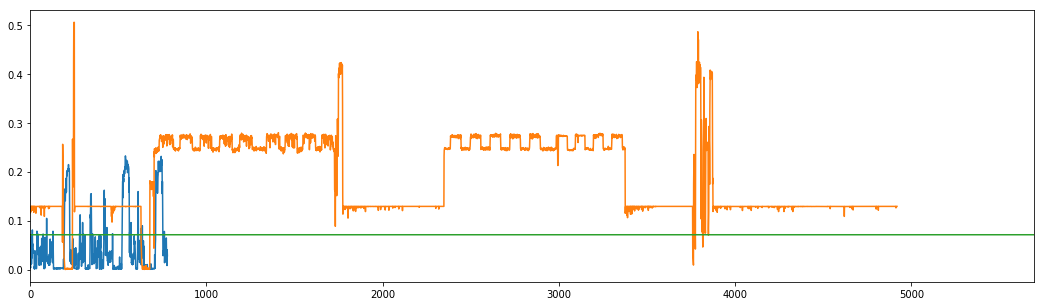

In [4]:
threshold = para.get_threshold(mu,sigma)

# test

INFO:tensorflow:Restoring parameters from C:/Users/Bin/Desktop/Thesis/tmp/52test/LSTMAutoencoder_kdd99_v1_para.ckpt
Predict result :
tp: 14786.000,fp: 14.000,tn: 614.000,fn: 166.000,
P: 0.999,R: 0.989
Fbeta: 0.997


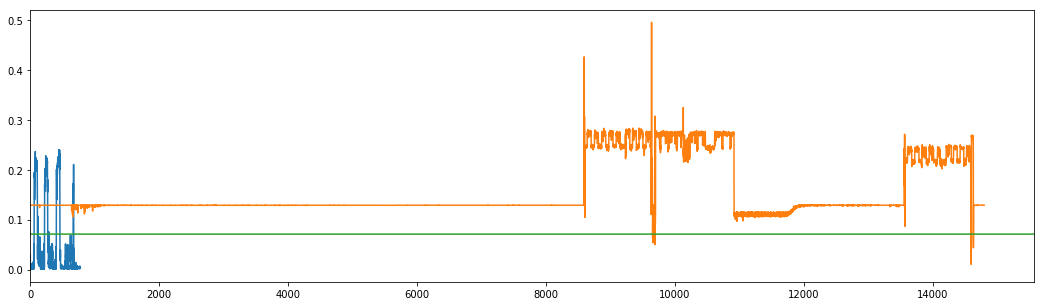

In [5]:
from EncDecAD_Test import EncDecAD_Test
 
test = EncDecAD_Test(conf)
test.test_encdecad(beta = 0.5)